In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from numpy import load

# Load data
n_steps = 60
series = load('univariate-time-series-multi-step.npy')

X_train, y_train = series[:9000, :n_steps], series[:9000, -10:]
X_valid, y_valid = series[9000:11000, :n_steps], series[9000:11000, -10:]
X_test, y_test = series[11000:, :n_steps], series[11000:, -10:]

# Reshape input to 3D for LSTM: (samples, timesteps, features)
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# Build LSTM Model
model = keras.models.Sequential([
    keras.layers.LSTM(50, return_sequences=False, input_shape=[n_steps, 1]),
    keras.layers.Dense(10)  # Output 10 predictions for multi-step forecasting
])

# Compile the model
model.compile(loss="mse", optimizer="adam")

# Train the model
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 19s 43ms/step - loss: 0.0958 - val_loss: 0.0454
Epoch 2/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 0.0368 - val_loss: 0.0274
Epoch 3/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - loss: 0.0265 - val_loss: 0.0222
Epoch 4/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 0.0234 - val_loss: 0.0208
Epoch 5/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - loss: 0.0213 - val_loss: 0.0197
Epoch 6/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - loss: 0.0197 - val_loss: 0.0185
Epoch 7/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.0187 - val_loss: 0.0178
Epoch 8/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - loss: 0.0180 - val_loss: 0.0177
Epoch 9/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - loss: 0.0174 - val_loss: 0.0173
Epoch 10/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - loss: 0.0167 - val_loss: 0.0163
Epoch 11/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - loss: 0.0158 - val_loss: 0.0167
Epoch 12/20
282/282 ━━━━━━━━━━━━━━━━━

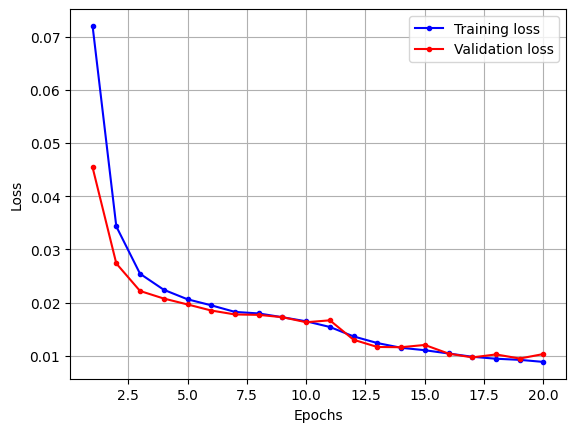

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0105
Test MSE: 0.009792618453502655


In [2]:
# Plot learning curves
import matplotlib.pyplot as plt

def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 1, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_learning_curves(history.history["loss"], history.history["val_loss"])

# Evaluate the model on test data
mse_test = model.evaluate(X_test, y_test)
print("Test MSE:", mse_test)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


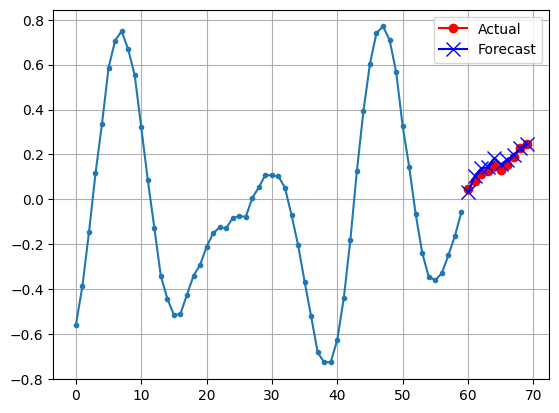

In [3]:
# Forecasting and plotting
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plt.plot(np.arange(n_steps), X[0, :, 0], ".-")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0], "ro-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0], "bx-", label="Forecast", markersize=10)
    plt.legend()
    plt.grid(True)
    plt.show()

# Load test data for multi-step forecasting
series_test = load('univariate-time-series-multi-step-test.npy')
X_new, Y_new = series_test[:, :n_steps, :], series_test[:, -10:, :]

# Predict the next 10 steps
Y_pred = model.predict(X_new)

# Plot the forecast vs actual values
plot_multiple_forecasts(X_new, Y_new, Y_pred)

